# Projeto Vendas Online

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dicionário de dados

Order ID: Unique identifier for each sales order.

Date:Date of the sales transaction.

Category:Broad category of the product sold (e.g., Electronics, Home Appliances, Clothing, Books, Beauty Products, Sports).

Product Name:Specific name or model of the product sold.

Quantity:Number of units of the product sold in the transaction.

Unit Price:Price of one unit of the product.

Total Price: Total revenue generated from the sales transaction (Quantity * Unit Price).

Region:Geographic region where the transaction occurred (e.g., North America, Europe, Asia).

Payment Method: Method used for payment (e.g., Credit Card, PayPal, Debit Card).

### Fonte da base de dados:

https://www.kaggle.com/datasets/shreyanshverma27/online-sales-dataset-popular-marketplace-data/data

### Objetivo do projeto:

Encontrar tendencias e insights

In [2]:
df = pd.read_csv('Online_Sales_Data.csv')

In [3]:
df

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [5]:
df.describe(include = object)

,Date,Product Category,Product Name,Region,Payment Method
count,240,240,240,240,240
unique,240,6,232,3,3
top,2024-01-01,Electronics,Dyson Supersonic Hair Dryer,North America,Credit Card
freq,1,40,2,80,120


In [6]:
df.describe().drop(columns = ['Transaction ID'])

,Units Sold,Unit Price,Total Revenue
count,240.000000,240.000000,240.000000
mean,2.158333,236.395583,335.699375
std,1.322454,429.446695,485.804469
min,1.000000,6.500000,6.500000
25%,1.000000,29.500000,62.965000
50%,2.000000,89.990000,179.970000
75%,3.000000,249.990000,399.225000
max,10.000000,3899.990000,3899.990000


In [7]:
df.shape

(240, 9)

In [8]:
df.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')

### Observando os valores distintos das variáveis.

In [9]:
df['Product Category'].unique()

array(['Electronics', 'Home Appliances', 'Clothing', 'Books',
       'Beauty Products', 'Sports'], dtype=object)

In [10]:
qtd_produtos = df['Product Name'].unique()

In [11]:
i = 0
for produtos in qtd_produtos:
    i += 1
print('A quantidade de produtos distindos é {}'.format(i))    

A quantidade de produtos distindos é 232


In [12]:
df['Region'].unique()

array(['North America', 'Europe', 'Asia'], dtype=object)

In [13]:
df['Payment Method'].unique()

array(['Credit Card', 'PayPal', 'Debit Card'], dtype=object)

In [14]:
df['Product Category'].value_counts()

Product Category
Electronics        40
Home Appliances    40
Clothing           40
Books              40
Beauty Products    40
Sports             40
Name: count, dtype: int64

In [15]:
df['Region'].value_counts()

Region
North America    80
Europe           80
Asia             80
Name: count, dtype: int64

In [16]:
df['Payment Method'].value_counts()

Payment Method
Credit Card    120
PayPal          80
Debit Card      40
Name: count, dtype: int64

### Alterando a coluna de data para o tipo data

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    240 non-null    int64         
 1   Date              240 non-null    datetime64[ns]
 2   Product Category  240 non-null    object        
 3   Product Name      240 non-null    object        
 4   Units Sold        240 non-null    int64         
 5   Unit Price        240 non-null    float64       
 6   Total Revenue     240 non-null    float64       
 7   Region            240 non-null    object        
 8   Payment Method    240 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 17.0+ KB


In [19]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


### Vamos ver o preço do produto mais caro:

In [20]:
prod_mais_caro = df.loc[df['Unit Price'].idxmax(), 'Product Name']

In [21]:
prod_mais_caro

'Canon EOS R5 Camera'

In [22]:
produto_mais_caro_df = df[df['Product Name'] == prod_mais_caro]

In [23]:
produto_mais_caro_df

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
102,10103,2024-04-12,Electronics,Canon EOS R5 Camera,1,3899.99,3899.99,North America,Credit Card


### Vamos ver o preço do produto mais barato:

In [24]:
prod_mais_barato = df.loc[df['Unit Price'].idxmin(), 'Product Name']

In [25]:
prod_mais_barato

'The Ordinary Niacinamide Serum'

In [26]:
produto_mais_barato_df = df[df['Product Name'] == prod_mais_barato]

In [27]:
produto_mais_barato_df

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
106,10107,2024-04-16,Beauty Products,The Ordinary Niacinamide Serum,1,6.5,6.5,Europe,PayPal


### Vamos analisar a quantidade de vendas durante o ano.

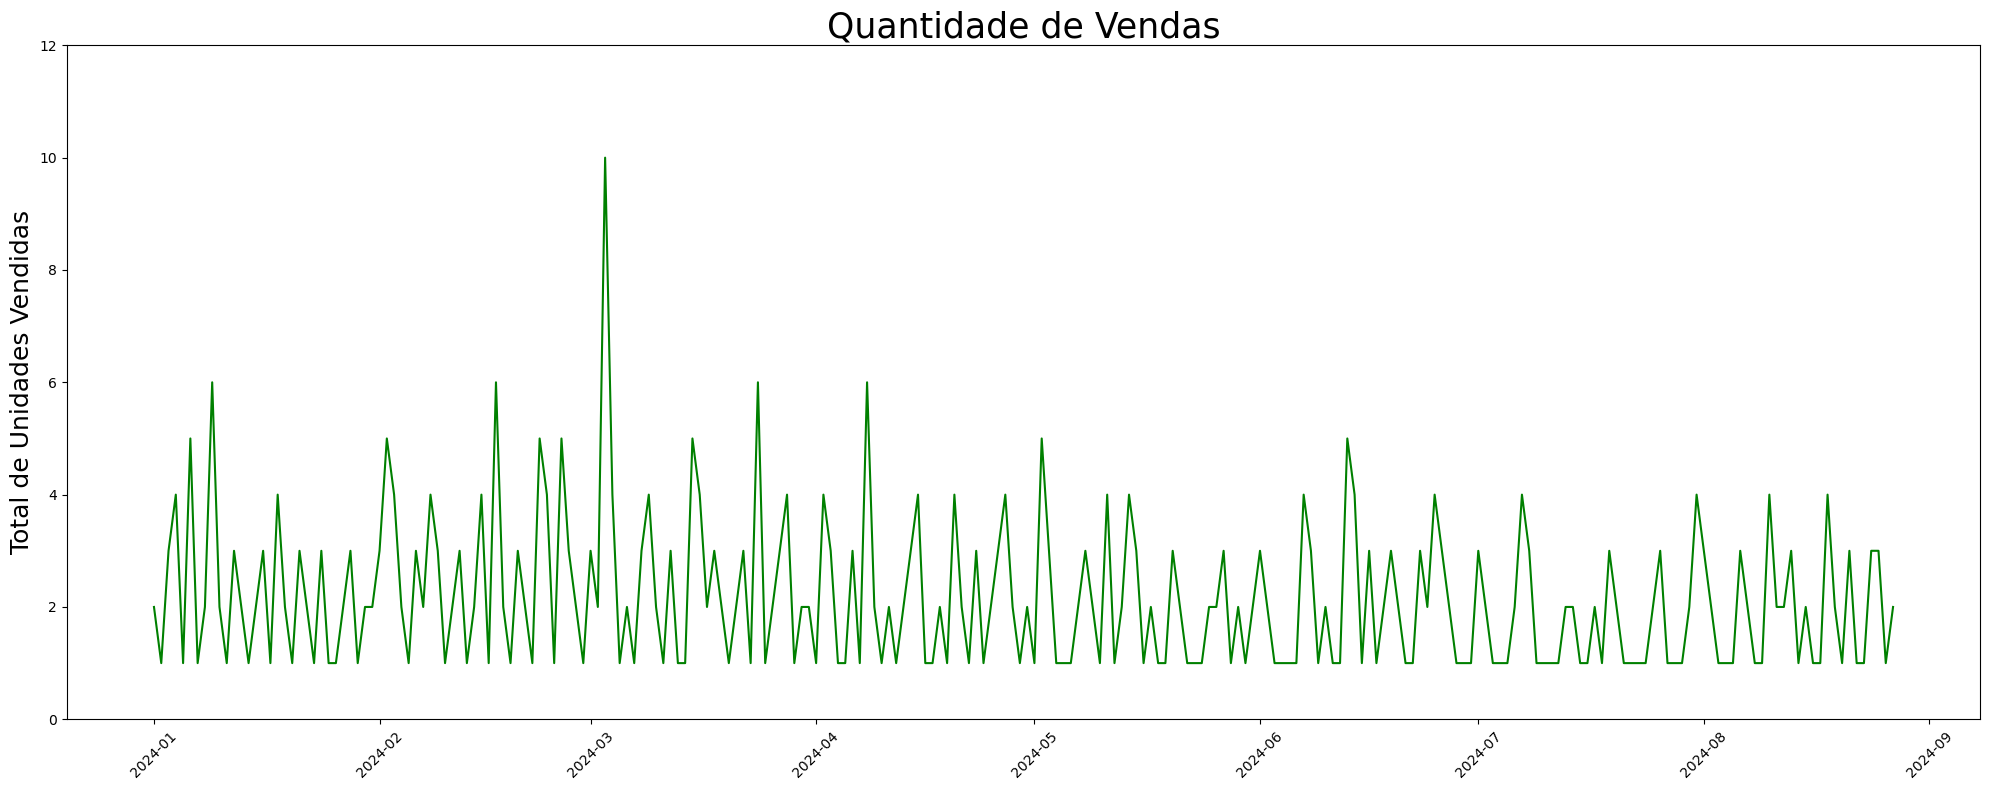

In [28]:
# Criando o gráfico de linhas
plt.figure(figsize=(20, 8))
plt.plot(df['Date'], df['Units Sold'], color='green')

# Configurando os rótulos e o título
plt.xlabel('')
plt.ylabel('Total de Unidades Vendidas', size = 18)
plt.title('Quantidade de Vendas', size = 25)
plt.xticks(rotation=45)
plt.ylim(0, 12)
plt.tight_layout()
plt.show()

### Analisando a quantidade de produtos vendidas por categoria

In [29]:
total_vendido_por_categoria = df.groupby('Product Category')['Units Sold'].sum().reset_index()

In [30]:
total_vendido_por_categoria

,Product Category,Units Sold
0,Beauty Products,46
1,Books,114
2,Clothing,145
3,Electronics,66
4,Home Appliances,59
5,Sports,88


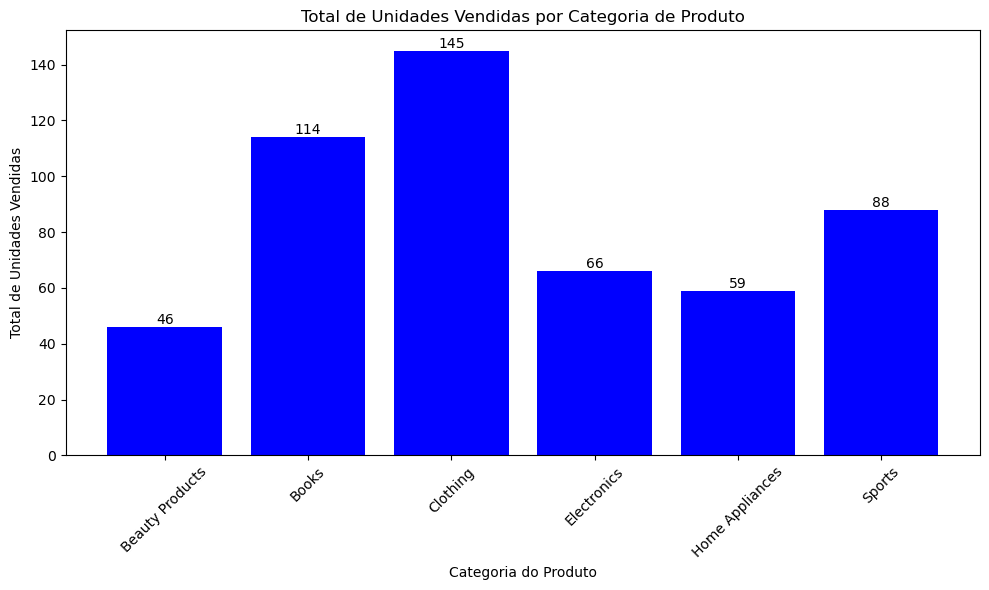

In [31]:
# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(total_vendido_por_categoria['Product Category'], total_vendido_por_categoria['Units Sold'], color='blue')

# Adicionando rótulos de dados nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

# Configurando os rótulos e o título
plt.xlabel('Categoria do Produto')
plt.ylabel('Total de Unidades Vendidas')
plt.title('Total de Unidades Vendidas por Categoria de Produto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analisando a quantidade de vendida por método de pagamento

In [32]:
total_vendido_met_pagamento = df.groupby('Payment Method')['Units Sold'].sum().reset_index()

In [33]:
total_vendido_met_pagamento

,Payment Method,Units Sold
0,Credit Card,268
1,Debit Card,145
2,PayPal,105


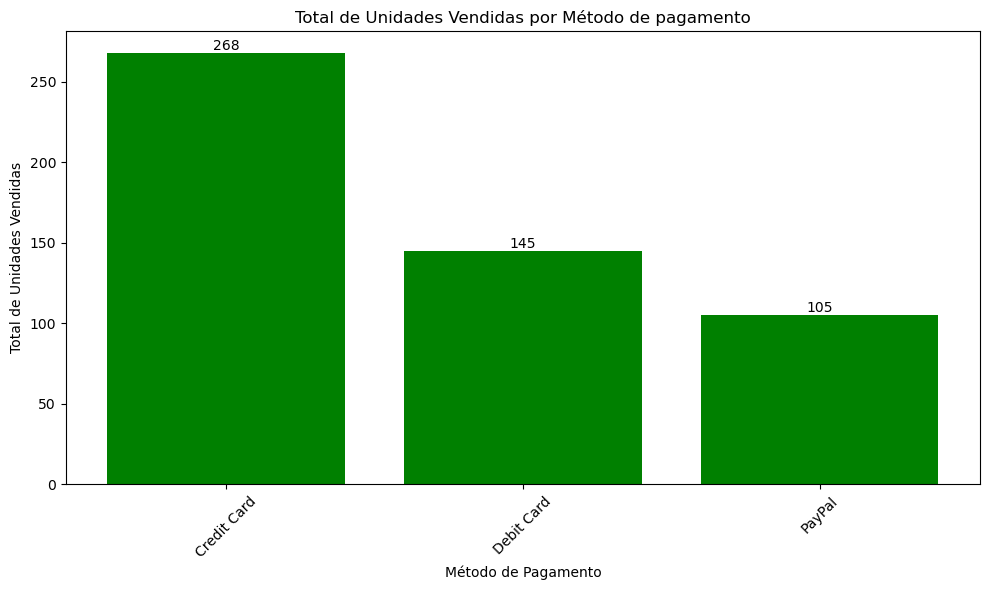

In [34]:
# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(total_vendido_met_pagamento['Payment Method'], total_vendido_met_pagamento['Units Sold'], color='green')

# Adicionando rótulos de dados nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

# Configurando os rótulos e o título
plt.xlabel('Método de Pagamento')
plt.ylabel('Total de Unidades Vendidas')
plt.title('Total de Unidades Vendidas por Método de pagamento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analisando a quantidade de vendida por Região

In [35]:
total_vendido_regiao = df.groupby('Region')['Units Sold'].sum().reset_index()

In [36]:
total_vendido_regiao

,Region,Units Sold
0,Asia,233
1,Europe,105
2,North America,180


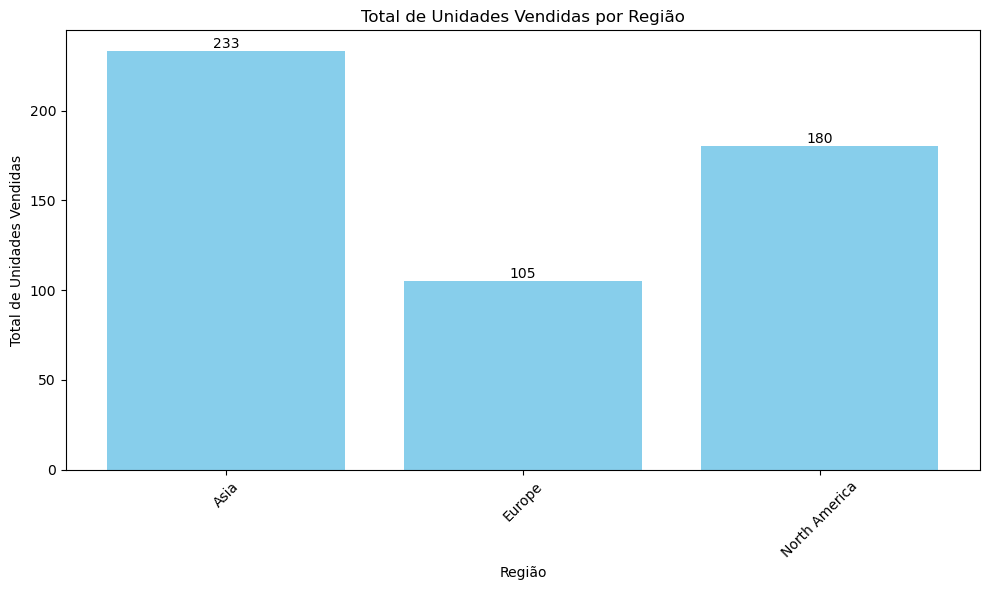

In [37]:
# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(total_vendido_regiao['Region'], total_vendido_regiao['Units Sold'], color='skyblue')

# Adicionando rótulos de dados nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

# Configurando os rótulos e o título
plt.xlabel('Região')
plt.ylabel('Total de Unidades Vendidas')
plt.title('Total de Unidades Vendidas por Região')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Analisando o lucro por categoria de produto.

In [38]:
lucro_categoria = df.groupby('Product Category')['Total Revenue'].sum().reset_index()

In [39]:
lucro_categoria

,Product Category,Total Revenue
0,Beauty Products,2621.90
1,Books,1861.93
2,Clothing,8128.93
3,Electronics,34982.41
4,Home Appliances,18646.16
5,Sports,14326.52


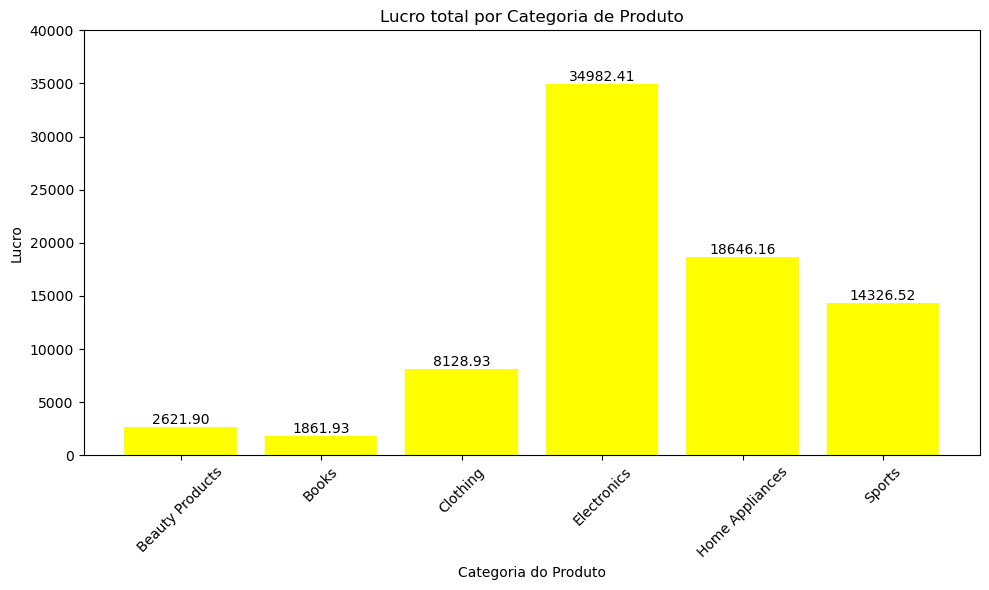

In [40]:
# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(lucro_categoria['Product Category'], lucro_categoria['Total Revenue'], color='yellow')

# Adicionando rótulos de dados nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Configurando os rótulos e o título
plt.xlabel('Categoria do Produto')
plt.ylabel('Lucro')
plt.ylim(0, 40000)
plt.title('Lucro total por Categoria de Produto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Vamos analisar o lucro por Região e Categoria de Produto

In [41]:
regiao_categoria_df = df.groupby(['Region', 'Product Category'])['Total Revenue'].sum().reset_index()

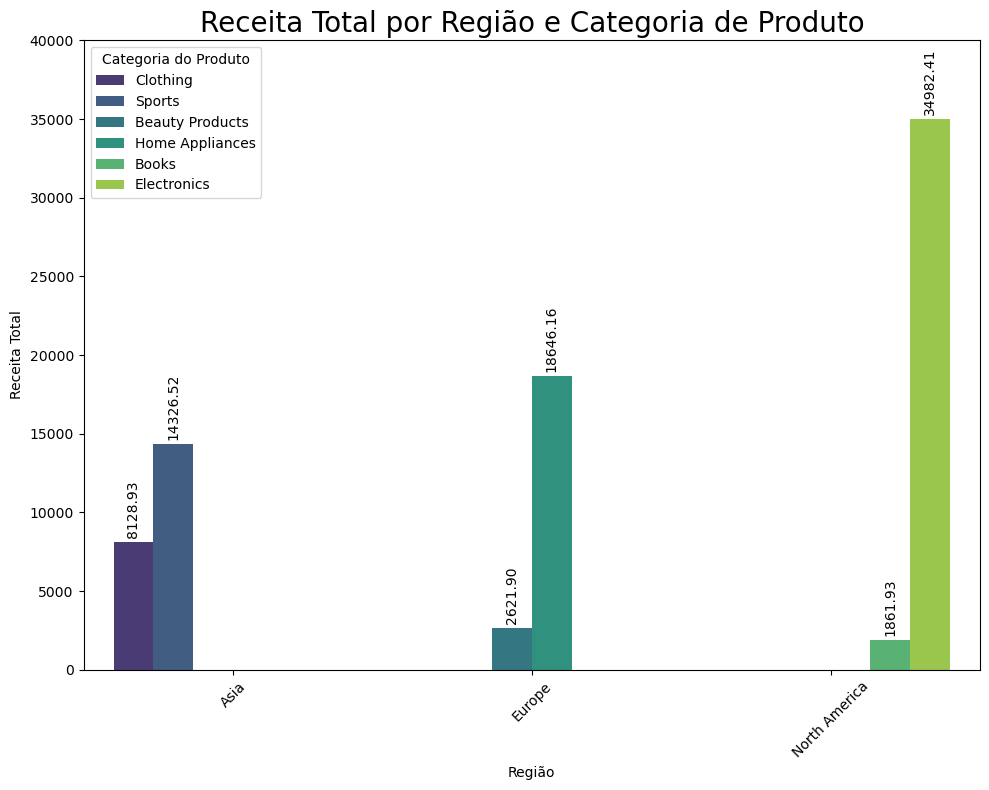

In [42]:
# Criando o gráfico de barras usando seaborn
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Region', y='Total Revenue', hue='Product Category', data=regiao_categoria_df, palette='viridis')

# Adicionando rótulos de dados nas barras para facilitar a leitura dos valores
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, rotation=90)

# Configurando os rótulos e o título
plt.xlabel('Região')
plt.ylabel('Receita Total')
plt.title('Receita Total por Região e Categoria de Produto', size = 20)
plt.xticks(rotation=45)
plt.ylim(0, 40000)
plt.legend(title='Categoria do Produto')
plt.tight_layout()
plt.show()